In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from iminuit import Minuit
import sys
from distfit import distfit
plt.rcParams.update({'font.size': 18})

In [4]:
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

## Distributions fits 

In [5]:
#functions
def func_gaussian(x, N, mu, sigma) :
    return N * stats.norm.pdf(x, mu, sigma)
def func_gamma(x, N, a,loc,scale): 
    return N *stats.gamma.pdf(x,a,loc,scale)
def func_expon(x,N, loc, scale):
    return N*stats.expon.pdf(x, loc, scale)
#find distributions
def find_dis(dis):
    # Initialize distfit
    dist = distfit()
    # Determine best-fitting probability distribution for data
    dist.fit_transform(dis)
    dist.plot()

In [6]:
#example 1
mean = 53
num =10000
std = 3
Nbins = 15
random_gaussian = stats.norm.rvs(loc=mean, scale=std,size=num) 

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0005846] [loc=53.013 scale=3.008]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.1542860] [loc=40.571 scale=12.441]
[distfit] >[pareto    ] [0.37 sec] [RSS: 0.1701082] [loc=-0.119 scale=40.690]
[distfit] >[dweibull  ] [0.19 sec] [RSS: 0.0034696] [loc=53.112 scale=2.570]
[distfit] >[t         ] [0.28 sec] [RSS: 0.0005847] [loc=53.013 scale=3.007]
[distfit] >[genextreme] [0.65 sec] [RSS: 0.0009775] [loc=51.886 scale=2.990]
[distfit] >[gamma     ] [0.12 sec] [RSS: 0.0005736] [loc=-500.058 scale=0.016]
[distfit] >[lognorm   ] [0.75 sec] [RSS: 0.0005571] [loc=-138.884 scale=191.870]
[distfit] >[beta      ] [0.31 sec] [RSS: 0.0005733] [loc=-45.630 scale=218.309]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.1091723] [loc=40.571 scale=23.390]
[distfit] >[loggamma  ] [0.33 sec] [RSS: 0.0006320] [loc=-497.343 scale=82.989]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


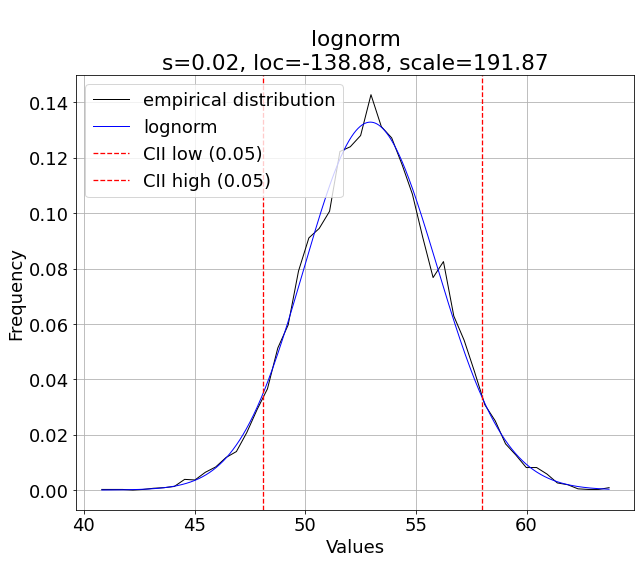

In [7]:
find_dis(random_gaussian)

In [8]:
#parameters
xmin = min(random_gaussian)
xmax = max(random_gaussian) 
counts, bin_edges = np.histogram(random_gaussian, bins=Nbins)
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
x = bin_centers[counts>0]
y = counts[counts>0]
s_counts = np.sqrt(counts)
sy = s_counts[counts>0]

In [9]:
#iminuit fit 
chi2_gaussian = Chi2Regression(func_gaussian, x, y, sy)
chi2_gaussian.errordef = 1
#find paramaters
minuit_gaussian = Minuit(chi2_gaussian, N=1000, mu=np.mean(random_gaussian), sigma=np.std(random_gaussian,ddof=1))  #      
# Perform the actual fit
minuit_gaussian.migrad()
    

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 14.58                      │              Nfcn = 65               │
│ EDM = 2.44e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │  15.57e3  │  0.16e3   │            │            │         │         │       │
│ 1 │ mu    │  53.016   │   0.030   │            │            │         │         │       │
│ 2 │ sigma │   3.039   │   0.022   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │        N       mu    sigma │
├───────┼────────────────────────────┤
│     N │ 2.43e+04  0.00237  0.00549 │
│    mu │  0.00237 0.000929  2.6e-05 │
│ sigma │  0.00549  2.6e-05 0.000471 │
└───────┴────────────────────────────┘

In [10]:
Chi2_gau = minuit_gaussian.fval
Ndof_gau = len(x) -  len(minuit_gaussian.values[:])   
Ndof_gau, Chi2_gau
Prob_gau = stats.chi2.sf(Chi2_gau, Ndof_gau)

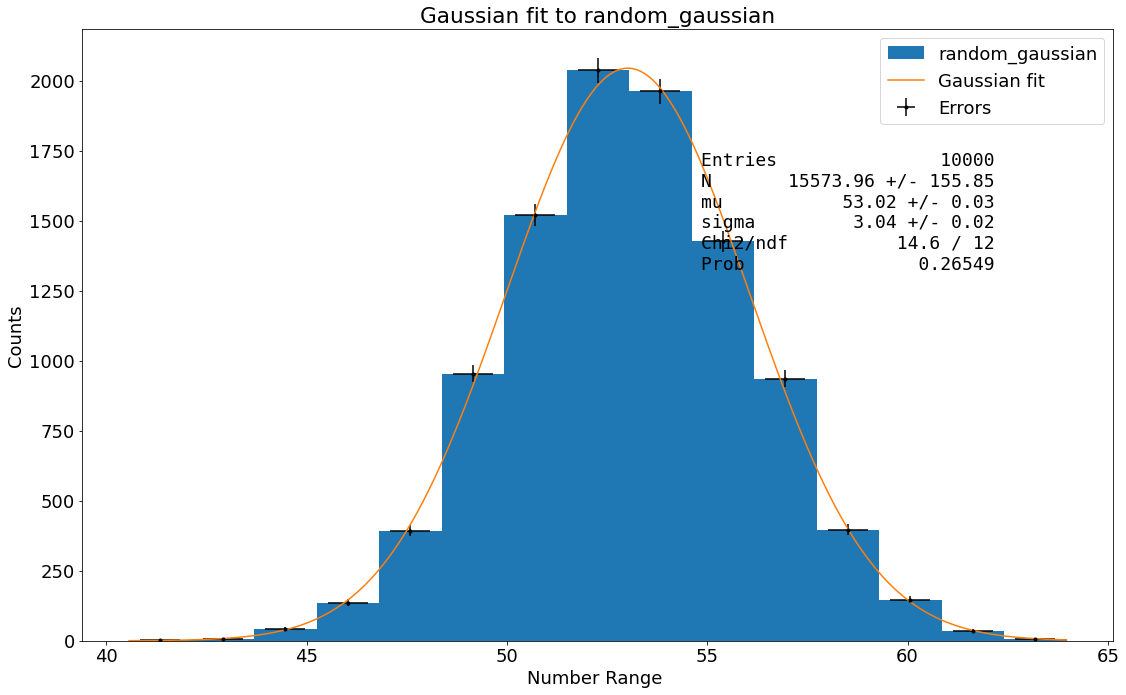

In [11]:
#plot
#plot parameters 
xaxis = np.linspace(xmin, xmax, 1000)
yaxis = func_gaussian(xaxis, *minuit_gaussian.values[:])

#figure
fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(random_gaussian,bins=Nbins,label='random_gaussian')
ax.errorbar(x, y, yerr=sy, xerr=0.5, label='Errors', fmt='.k',  ecolor='k', elinewidth=1.5, capthick=2)
ax.plot(xaxis, yaxis, label=f'Gaussian fit')
ax.set(xlabel='Number Range ', ylabel='Counts',title='Gaussian fit to random_gaussian')
#iminuit legend

names = ['Entries','N','mu', 'sigma', 'Chi2/ndf', 'Prob']
values = ["{:d}".format(len(random_gaussian)),
              "{:.2f} +/- {:.2f}".format(minuit_gaussian.values['N'], minuit_gaussian.errors['N']),
              "{:.2f} +/- {:.2f}".format(minuit_gaussian.values['mu'], minuit_gaussian.errors['mu']),
              "{:.2f} +/- {:.2f}".format(minuit_gaussian.values['sigma'], minuit_gaussian.errors['sigma']),
              "{:.1f} / {:d}".format(Chi2_gau, Ndof_gau),
              "{:.5f}".format(Prob_gau),
              ]
d={}
for n,v in zip(names,values):
    d[n]=v

ax.text(0.60, 0.80, nice_string_output(d, 0), family='monospace', 
        transform=ax.transAxes, fontsize=18, color='black', verticalalignment='top')

fig.tight_layout()
ax.legend()
plt.show()

## Constant fit

In [12]:
results = np.array([9.54,9.36,10.02,9.87,9.98,9.86,9.86,9.81,9.79])
uncertanties= np.array([0.15,0.10,0.11,0.08,0.14,0.06,0.03,0.013,0.04])

In [13]:
# chi2 fit of constant
def chi2_constant(c):
    y_fit = np.ones_like(y) * c
    chi2 = np.sum(((y - y_fit) / sy)**2)
    return chi2
def constant_fit(y,sy):
    chi2_constant.errordef = Minuit.LEAST_SQUARES 
    minuit_simple = Minuit(chi2_constant, c=0)
    minuit_simple.migrad()

    c = minuit_simple.values[:][0]
    ec = minuit_simple.errors[:][0]
    res = y-chi2_constant(c)

    chi2 = minuit_simple.fval
    ndof =  len(y) - minuit_simple.nfit
    prob = stats.chi2.sf(chi2, ndof)

    return c, ec, res, chi2, ndof, prob

y = results
sy = uncertanties

g, eg, res, chi2, ndof, prob = constant_fit(y, sy)
print(f'g = ({g:.02f} ± {eg:.02f}), P(Chi2={chi2:.02f}, N_dof={ndof}) = {prob:.04f}')

g = (9.81 ± 0.01), P(Chi2=32.74, N_dof=8) = 0.0001
